# PM2.5 Vs Meteo variables

In [ ]:
##### LIBRARIES IN USE #########
import pandas as pd
import numpy as np

##### DataViz ##########
import matplotlib.pyplot as plt
import seaborn as sns

####### Machine Learning ##########
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from prophet import Prophet


C:\Users\sophi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


## 1. Preparing the dataset to predict on PM2.5 pollutants

* Source: file "P3_WildAir/Open_Meteo_com/OpenMeteo_data/dwl_csv_openmeteo_2124.ipynb";
* source: file "P3 wildAir\p3_WildAir\Open_Meteo_com\OpenMeteo_data\csv_wind4ML.ipynb";
* Each meteo features have the unity measure on title;
* For the wind "u10" and "v10" unities (number means speed):
    - A positive "u" means wind blowing from the West to East (if negative is in the opposing direction);
    - A positive "v" is wind blowing from South to North (if negative...);
* Each pollutant is on micrograms (one-millionth of a gram) per cubic meter air or "µg/m3".

### 1.1 Charging the csv into a dataframe

In [2]:
df_pm25meteo = pd.read_csv(r"C:\Users\sophi\FrMarques\LyonData WCS new\P3 wildAir\p3_WildAir\Open_Meteo_com\OpenMeteo_data\CSV\CSV_meteopollu_final\meteopolluwind2124_final.csv")

In [4]:
df_pm25meteo.columns # after droping "unnamed: 0" column

Index(['date_id', 'month_num', 'temp_c', 'humidity_%', 'rain_mm',
       'snowfall_cm', 'atmopressure_hpa', 'cloudcover_%', 'windspeed_kmh',
       'winddirection_360', 'NO2', 'O3', 'PM10', 'PM2.5', 'SO2',
       'windspeed_ms', 'u10', 'v10'],
      dtype='object')

In [3]:
df_pm25meteo = df_pm25meteo.drop(columns="Unnamed: 0")

In [9]:
print(df_pm25meteo.shape)
display(df_pm25meteo.head(3))
display(df_pm25meteo.sample(3))
display(df_pm25meteo.tail(3))

(1461, 18)


,date_id,month_num,temp_c,humidity_%,rain_mm,snowfall_cm,atmopressure_hpa,cloudcover_%,windspeed_kmh,winddirection_360,NO2,O3,PM10,PM2.5,SO2,windspeed_ms,u10,v10
0,2021-01-01,1,2.599667,85.773796,0.075000,0.002917,988.10660,95.291664,12.806746,337.38327,71.0,58.3,24.2,24.2,8.1,3.557432,1.368064,-3.283859
1,2021-01-02,1,1.618417,79.047424,0.008333,0.023333,989.22394,95.791664,20.723036,336.34866,46.0,49.8,23.2,16.4,31.4,5.756403,2.309296,-5.272886
2,2021-01-03,1,1.016333,78.578060,0.000000,0.017500,991.02985,86.666664,11.569545,301.66028,77.5,49.8,57.3,55.9,4.7,3.213765,2.735477,-1.686846


,date_id,month_num,temp_c,humidity_%,rain_mm,snowfall_cm,atmopressure_hpa,cloudcover_%,windspeed_kmh,winddirection_360,NO2,O3,PM10,PM2.5,SO2,windspeed_ms,u10,v10
1291,2024-07-15,7,22.649668,78.979614,0.266667,0.0,992.267330,72.291664,10.573695,175.201720,55.0,90.1,35.6,16.3,2.0,2.937140,-0.245686,2.926846
1071,2023-12-08,12,7.841583,92.833333,0.616667,0.0,993.432136,98.125000,4.613954,180.154421,82.0,52.5,32.1,32.7,1.5,1.281655,0.003454,1.281650
1427,2024-11-28,11,8.562166,90.564156,0.050000,0.0,1005.766360,95.833336,5.598671,206.138490,76.5,46.8,121.2,41.0,3.4,1.555188,0.685126,1.396142


,date_id,month_num,temp_c,humidity_%,rain_mm,snowfall_cm,atmopressure_hpa,cloudcover_%,windspeed_kmh,winddirection_360,NO2,O3,PM10,PM2.5,SO2,windspeed_ms,u10,v10
1458,2024-12-29,12,-1.177417,97.066895,0.0,0.0,1011.31660,94.166664,3.711657,333.32767,56.5,20.4,43.7,33.5,31.4,1.031017,0.462810,-0.921304
1459,2024-12-30,12,-1.248250,94.168620,0.0,0.0,1012.07794,100.000000,2.209112,258.41135,64.9,23.0,40.7,25.6,8.6,0.613643,0.601134,0.123271
1460,2024-12-31,12,-0.817000,89.934456,0.0,0.0,1011.63837,61.708332,1.884526,164.20848,70.2,6.6,49.0,38.3,3.3,0.523480,-0.142459,0.503723


### Adjusting meteo columns to 2 decimal cases
(step canceled to keep the maximum data for the ML)

In [ ]:
# ########## List of numerical meteo columns to be adjusted:
# col_meteo = ["temp_c", "humidity_%", "rain_mm", "snowfall_cm", "atmopressure_hpa", \
#     "cloudcover_%", "windspeed_kmh", "winddirection_360"]

# # Round up the columns to 2 decimal cases:
# df_pm25meteo[col_meteo] = df_pm25meteo[col_meteo].round(2)

### 1.2 Setting the "date" as index

In [6]:
############## Setting "Date" as the index of the dataset if it is not:
df_pm25meteo.set_index('date_id', inplace=True)

# Setting the index ("Date") as "datetime" dtype:
df_pm25meteo.index = pd.to_datetime(df_pm25meteo.index)

### 1.3 Reducing the dataset pollutants to PM2.5 and meteo collumns

In [7]:
df_pm25meteo = df_pm25meteo[['temp_c', 'humidity_%', 'rain_mm', 'snowfall_cm',
       'atmopressure_hpa', 'cloudcover_%', 'u10',
       'v10', 'PM2.5']]

## 2. Correlations pm25 vs. meteo

### 2.1 Correlations heatmap

In [8]:
########## Setting up the correlation matrix (Pearson/Linear by default):
corr_pm25 = df_pm25meteo.corr()

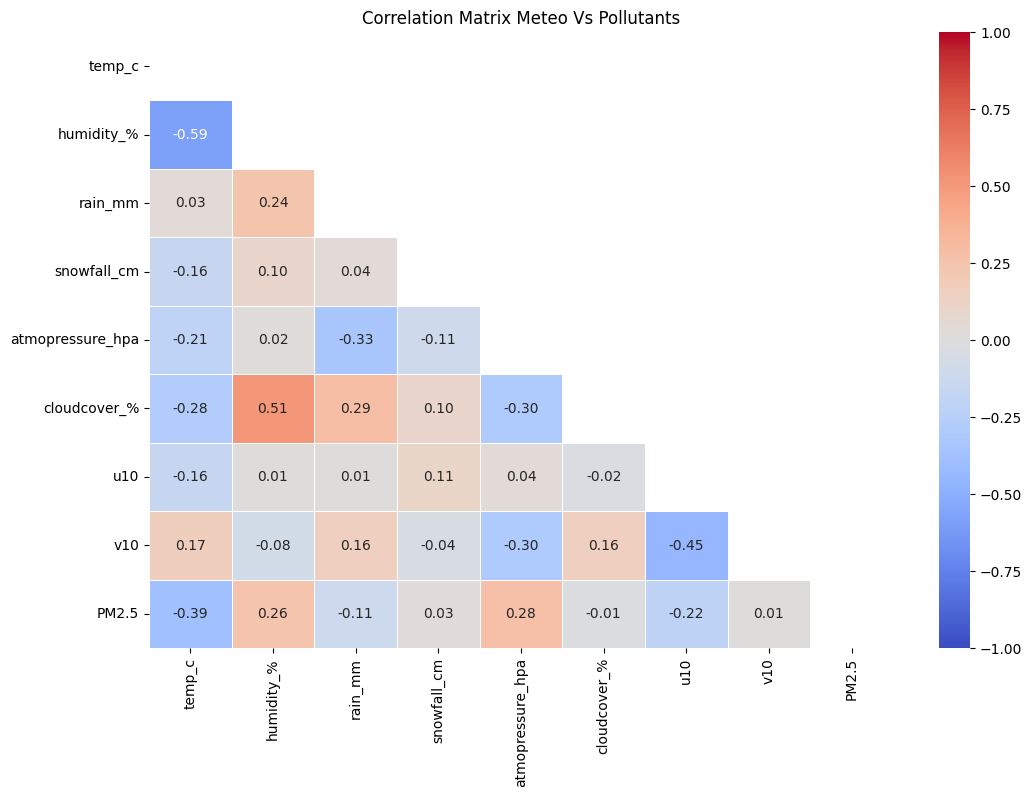

In [ ]:
############ Setting up a mask for the Matrix to make it easier to read:
mask = np.triu(np.ones_like(corr_pm25, dtype=bool))

# Size of the figure frame:
plt.figure(figsize=(12, 8))

# Building the Seaborn heatmap:
sns.heatmap(
    corr_pm25, 
    mask=mask,  # Apply the mask;
    annot=True,  # Show correlations values;
    fmt=".2f",  # Limiting the values to 2 decimal cases;
    cmap="coolwarm",  # The map colours (blue to red);
    linewidths=0.5,  # Adding lines to separate cells;
    vmin=-1, vmax=1  # Setting boundaries to the colour scale.
)

# Graph title:
plt.title("Correlation Matrix Meteo Vs Pollutants")
plt.show()

### 2.2 Confrontational scatterplots  

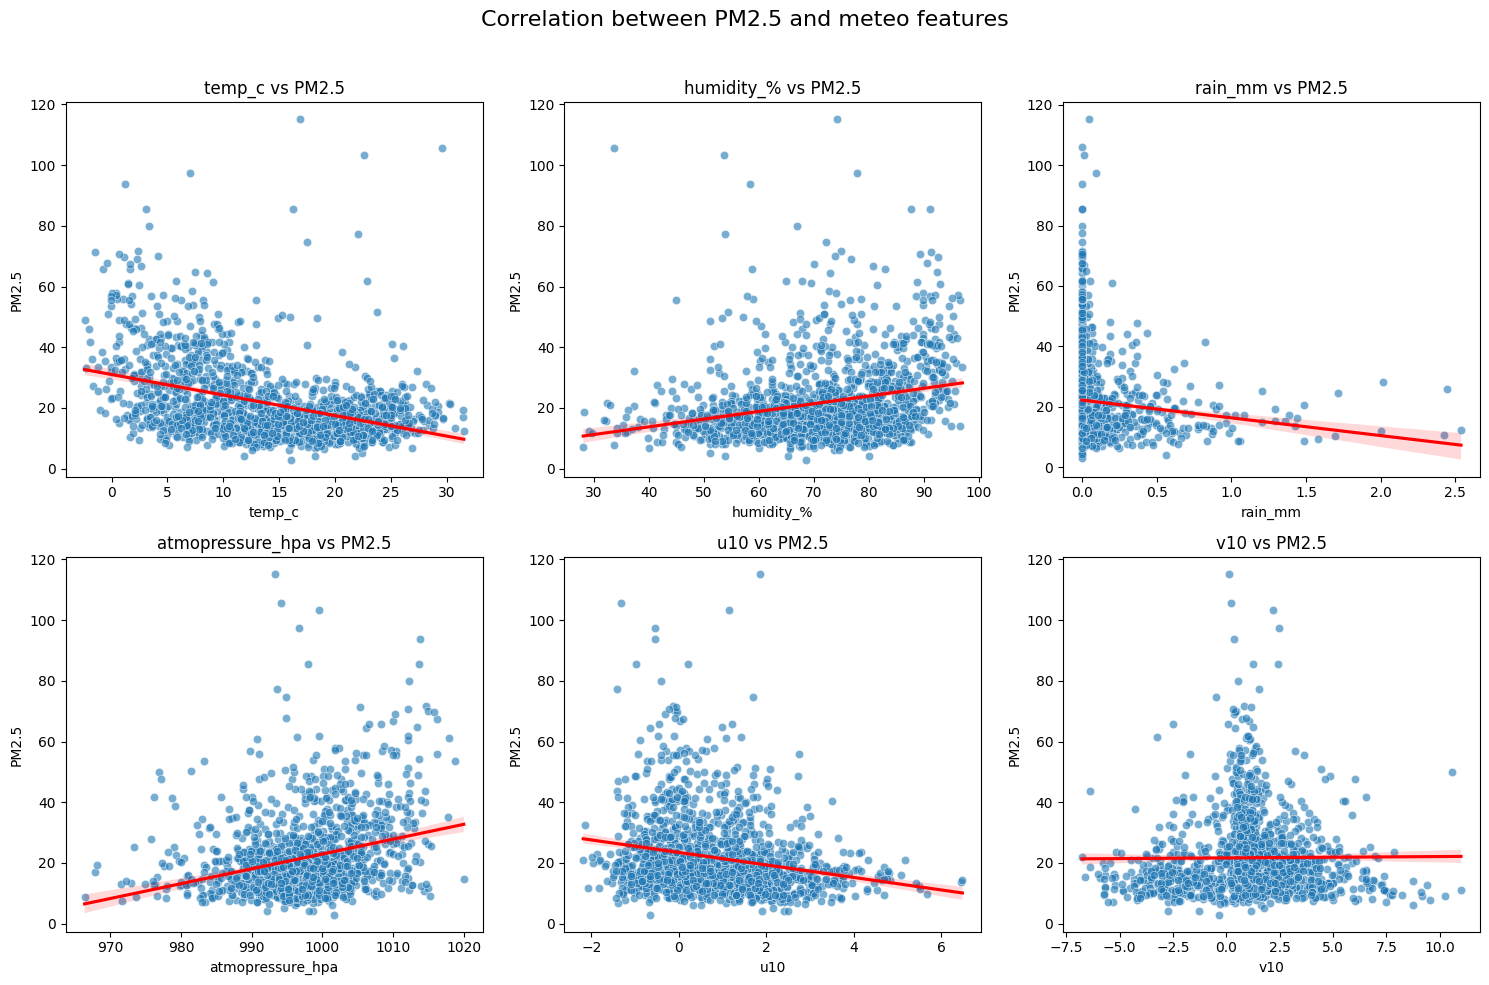

In [ ]:
##### Setting the meteo features to use in the scatterplots against the target (pm25)
var_meteo = ["temp_c", "humidity_%", "rain_mm", "atmopressure_hpa", "u10", "v10"]
var_pol = ["PM2.5"]

# Building the sctatterplots to visualize the correlations between each feature and PM2.5
for pollutant in var_pol:
    num_features = len(var_meteo)   # checking the length/number of features to scatterplot;
    cols = 3                        # Number of columns to frame the subplots;
    rows = (num_features // cols) + (num_features % cols > 0)  # Setting the necessary rows to frame the subplots;
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))    # Setting the frame figure size;
    fig.suptitle(f"Correlation between {pollutant} and meteo features", fontsize=16)
    
    for i, meteo in enumerate(var_meteo):   # getting and index for each val_meteo;
        row, col = divmod(i, cols)          # divide the index of a var_meteo by the columns and give back row/col for the graph;
        ax = axes[row, col] if rows > 1 else axes[col]  # Adjust if more than 1 line or just one (there's 2);

        x = df_pm25meteo[meteo]     # setting "x" and "y" values;
        y = df_pm25meteo[pollutant]
        
        sns.scatterplot(x=x, y=y, ax=ax, alpha=0.6)        # Creating scatterplot with dots 60% transparent;

        sns.regplot(x=x, y=y, ax=ax, scatter=False, line_kws={"color": "red"})  # Adding a red regression line;

        ax.set_title(f"{meteo} vs {pollutant}")        # Setting labels and title for scatter;
        ax.set_xlabel(meteo)
        ax.set_ylabel(pollutant)

    for j in range(num_features, rows * cols):  # Removing empty axes if less scatters than the places available;
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout(rect=[0, 0, 1, 0.96])  #Adjust layout to frame figure and save space (0.04) for the title;
    plt.show()

## 3. Machine Learning: Random Forest Regresso

### 3.1 Preparing the features

In [ ]:
df_pm25meteo_ml = df_pm25meteo.copy()       # creating a copy of the "df" to be used by the ML model;
columns2drop = ["snowfall_cm", "cloudcover_%" ] # droping the features with insignificant correlation with the target (pm25);
df_pm25meteo_ml = df_pm25meteo_ml.drop(columns=columns2drop)

In [ ]:
df_pm25meteo_ml.to_csv("df_pm25meteo_ml.csv", index=True)

In [24]:
df_pm25meteo_ml = pd.read_csv(r"C:\Users\sophi\FrMarques\LyonData WCS new\P3 wildAir\p3_WildAir\Correlation_meteo_poll\CSV crr\df_pm25meteoml.csv")

### 3.2 Random Forest Regression with a sliding (time) window
* As the Random Forest doesn't recognize a date feature we need to create some more features to teach the model a pattern linked to time, meaning we're adding in each line the values of our target from previous days (t = that date of the row; t-1 = the day before; t-2 = 2 days before...)

In [25]:
###### Setting "date_id" as index, to be invisible during the algorithme work:
df_pm25meteo_ml["date_id"] = pd.to_datetime(df_pm25meteo_ml["date_id"])

In [27]:
#### Setting a sliding window of 3 days:
window_size = 3

for i in range(1, window_size + 1):             # loop starting by 1 to create the columns for each window (+1 sets the limit not included of 4) = 1 to 3;
    df_pm25meteo_ml[f"PM2.5_t-{i}"] = df_pm25meteo_ml["PM2.5"].shift(i)   # the t- window slide dynamic (f) creation where the "i" changes in each loop;

df_sliding = df_pm25meteo_ml.dropna().copy()                 # Removing the first lines wit "NaN" created by  the shift;

X_sliding = df_sliding.drop(columns=["date_id", "PM2.5"])    # Defining the X with the useful features;
y_sliding = df_sliding["PM2.5"]                              # Defining the target;

split_index = int(len(X_sliding) * 0.8)                      # Defining the teams "Train"/"Test" in a proportion 80/20, keeping
X_train_s, X_test_s = X_sliding.iloc[:split_index], X_sliding.iloc[split_index:]    #... the data cronology, which will
y_train_s, y_test_s = y_sliding.iloc[:split_index], y_sliding.iloc[split_index:]    #... be decisive here;

# X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(        # A more traditional way for split_train_test but;
#     X_sliding, y_sliding, test_size=0.2, shuffle=False, random_state=42   #... imposing no shuffle of data to keep vjronology;
#     )


X_train_s.shape, X_test_s.shape, y_train_s.shape, y_test_s.shape        # checking the size of each of the 4 teams created;


((1166, 9), (292, 9), (1166,), (292,))

In [ ]:
#### checking the minimum index for the X-teams for train and test;
print(X_train_s.index.min(), X_train_s.index.max()) # 3 lines should have been droped due to "Na?" values; 
print(X_test_s.index.min(), X_test_s.index.max())   # the rest of the rows/entries for cross_validation;

3 1168
1169 1460


#### 3.2.1 Training the RFR with a sliding window

In [ ]:
rfr_sliding = RandomForestRegressor(n_estimators=100, random_state=42) # 100 decising trees, keeping the sample unchanged;
rfr_sliding.fit(X_train_s, y_train_s)                                  # training the RFR

y_pred_s = rfr_sliding.predict(X_test_s)                                # predicting with the test "team";

# Evaluating the model
mae_s = mean_absolute_error(y_test_s, y_pred_s)
mse_s = mean_squared_error(y_test_s, y_pred_s)
rmse_s = root_mean_squared_error(y_test_s, y_pred_s)
r2_s = r2_score(y_test_s, y_pred_s)

mae_s, mse_s, rmse_s, r2_s

(np.float64(6.13923287671233),
 np.float64(93.47962678082193),
 np.float64(9.668486271429563),
 0.2972549731579145)

* The mean absolute error (mae) show us a gap of 6.14*g/m3 between the predictions and real values of PM2.5;
* The mean squared error (mse) is known to punish the higher mistakes and show a value not easy to read in the context of 93.48;
* The root mean squared error (rmse) is more intuitive than the mse because it gets the mse in the same scale of the data, giving us the average value of the biggest prediction errors: in some days, the predicted pollution can be wrong by more than 9.7µg/m3;

* R2 measure how well the model explains the variability of the predictions (1 being perfect, 0 no impact and negative means very poor predictions). In our his case, 0.30 shows the model is not catching in the best way the variability of the data;

Conclusion: The RFR returns a mean error of 6.14 µg/m3 (mae) but can make higher mistakes (9.67 rmse). Only 30% of the variability of the pm2.5 is explained, showing it can improve.

### 3.3 Optimizing the RFR

In [ ]:
param_grid = {                  # Setting different parameters to retest the RFR 2 times; 
    "n_estimators": [50, 100],  # with 50 trees and 100 trees;
    "max_depth": [10, 20],      # in a depth of 10 and 20;
    "min_samples_split": [2, 5], # 
    "min_samples_leaf": [1, 2]  #
}

rfr_gs = RandomForestRegressor(random_state=42) # creating the base model

grid_search = GridSearchCV(                     # setting the GridSearch to make 3 cross validations;
    estimator=rfr_gs, param_grid=param_grid, 
    cv=3, n_jobs=-1, scoring="neg_mean_absolute_error"
)

grid_search.fit(X_train_s, y_train_s)       # applying the GS;

best_params = grid_search.best_params_      # saving the best hyparameters;

print("Best hyperparametersMelhores hiperparâmetros encontrados:", best_params)

rf_best = RandomForestRegressor(**best_params, random_state=42) # Training the best RFR with the optimized params;
rf_best.fit(X_train_s, y_train_s)

y_pred_s = rf_best.predict(X_test_s)            # Making predictions with the "test" teams;

mae_s = mean_absolute_error(y_test_s, y_pred_s) # Evaluating the optimized model;
mse_s = mean_squared_error(y_test_s, y_pred_s)
rmse_s = np.sqrt(mse_s)
r2_s = r2_score(y_test_s, y_pred_s)

print(f"MAE: {mae_s:.2f}")
print(f"MSE: {mse_s:.2f}")
print(f"RMSE: {rmse_s:.2f}")
print(f"R²: {r2_s:.2f}")


Melhores hiperparâmetros encontrados: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
MAE: 6.01
MSE: 92.31
RMSE: 9.61
R²: 0.31


## 4. Machine Learning: Prophet (Meta)

* New model that needed "pip install";
* Known as robust model which considers trends, seasonality and special events;
* Said to be easy to use but a bit slow.
* Prophet Forecasting Machine was developed by Facebook/Meta ans is specialised in time predictions;
    - https://facebook.github.io/prophet/

### 4.1 Preparing the data for Prophet

In [9]:
df_pm25meteo_p = df_pm25meteo.copy()

In [10]:
df_pm25meteo_p = df_pm25meteo_p.reset_index()

In [11]:
df_pm25meteo_p.head(3)

,date_id,temp_c,humidity_%,rain_mm,snowfall_cm,atmopressure_hpa,cloudcover_%,u10,v10,PM2.5
0,2021-01-01,2.599667,85.773796,0.075000,0.002917,988.10660,95.291664,1.368064,-3.283859,24.2
1,2021-01-02,1.618417,79.047424,0.008333,0.023333,989.22394,95.791664,2.309296,-5.272886,16.4
2,2021-01-03,1.016333,78.578060,0.000000,0.017500,991.02985,86.666664,2.735477,-1.686846,55.9


In [27]:
df_pm25meteo_p.columns

Index(['ds', 'temp_c', 'humidity_%', 'rain_mm', 'snowfall_cm',
       'atmopressure_hpa', 'cloudcover_%', 'u10', 'v10', 'y'],
      dtype='object')

### 4.2 Peredicting pollution with Prophet

19:02:08 - cmdstanpy - INFO - Chain [1] start processing
19:02:09 - cmdstanpy - INFO - Chain [1] done processing


          ds       yhat  yhat_lower  yhat_upper
0 2021-01-01  31.166911   16.756309   46.118974
1 2021-01-02  30.886021   15.648891   45.425330
2 2021-01-03  30.479704   15.977109   44.772148
3 2021-01-04  30.960279   16.586831   44.927450
4 2021-01-05  31.910524   17.164042   46.000059


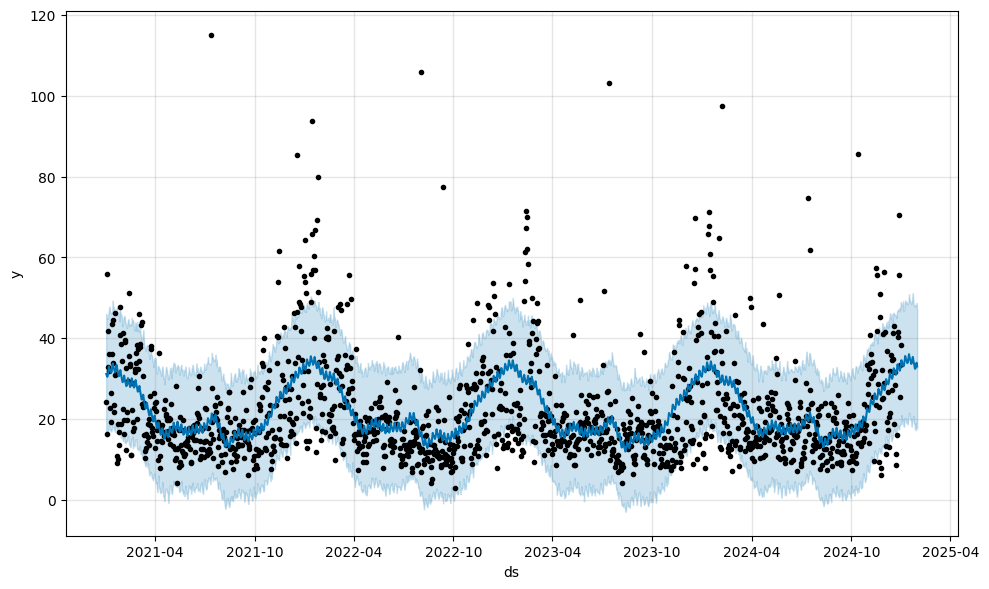

In [12]:
df_pm25meteo_p = df_pm25meteo_p.rename(columns={"date_id": "ds", "PM2.5": "y"})  # Prophet uses "ds" for dates and "y" for the target;

# Create and set the Prophet:
model_p = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# Adjusting the model to the data
model_p.fit(df_pm25meteo_p)

# Create a prediction dataframe for the next 30 days 
future_p = model_p.make_future_dataframe(periods=30)

# Faire the predictions
forecast_p = model_p.predict(future_p)

print(forecast_p[["ds", "yhat", "yhat_lower", "yhat_upper"]].head())

fig = model_p.plot(forecast_p)
plt.show()


In [13]:
forecast_p.tail(3)  # Mostra os últimos 30 dias da previsão

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1488,2025-01-28,22.973795,17.259736,48.109967,22.967560,22.980620,10.174317,10.174317,10.174317,0.178240,0.178240,0.178240,9.996077,9.996077,9.996077,0.0,0.0,0.0,33.148113
1489,2025-01-29,22.978692,19.108821,48.755344,22.972052,22.986075,10.974797,10.974797,10.974797,1.199462,1.199462,1.199462,9.775335,9.775335,9.775335,0.0,0.0,0.0,33.953489
1490,2025-01-30,22.983589,17.734494,46.859165,22.976607,22.991500,10.052953,10.052953,10.052953,0.493107,0.493107,0.493107,9.559847,9.559847,9.559847,0.0,0.0,0.0,33.036543


### 4.3 Evaluating Prophet results

In [19]:
df_pm25meteo_p = df_pm25meteo_p.rename(columns={"date_id": "ds", "PM2.5": "y"})
df_pm25meteo_p["ds"] = pd.to_datetime(df_pm25meteo_p["ds"])

forecast_p["ds"] = pd.to_datetime(forecast_p["ds"])

df_evaluation = df_pm25meteo_p.merge(forecast_p[["ds", "yhat"]], on="ds", how="inner")


In [20]:
# Calculating the metrics:
mae = mean_absolute_error(df_evaluation["y"], df_evaluation["yhat"])
mse = mean_squared_error(df_evaluation["y"], df_evaluation["yhat"])
rmse = np.sqrt(mse)
r2 = r2_score(df_evaluation["y"], df_evaluation["yhat"])

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")



MAE: 7.68
MSE: 130.62
RMSE: 11.43
R²: 0.22
